- Che tipo di brani ottengono più ascolti su Spotify?
- Qual è il periodo dell’anno migliore per pubblicare nuova musica?
- Generi con piu successo?
- Quali sono i canali piu utilizzati per le canzoni? (spotify, dieezer, apple)
- Quanti brani vengono pubblicati ogni anno?

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv(".\\res\\spotify_2023_clean.csv")
df.dropna(inplace=True)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


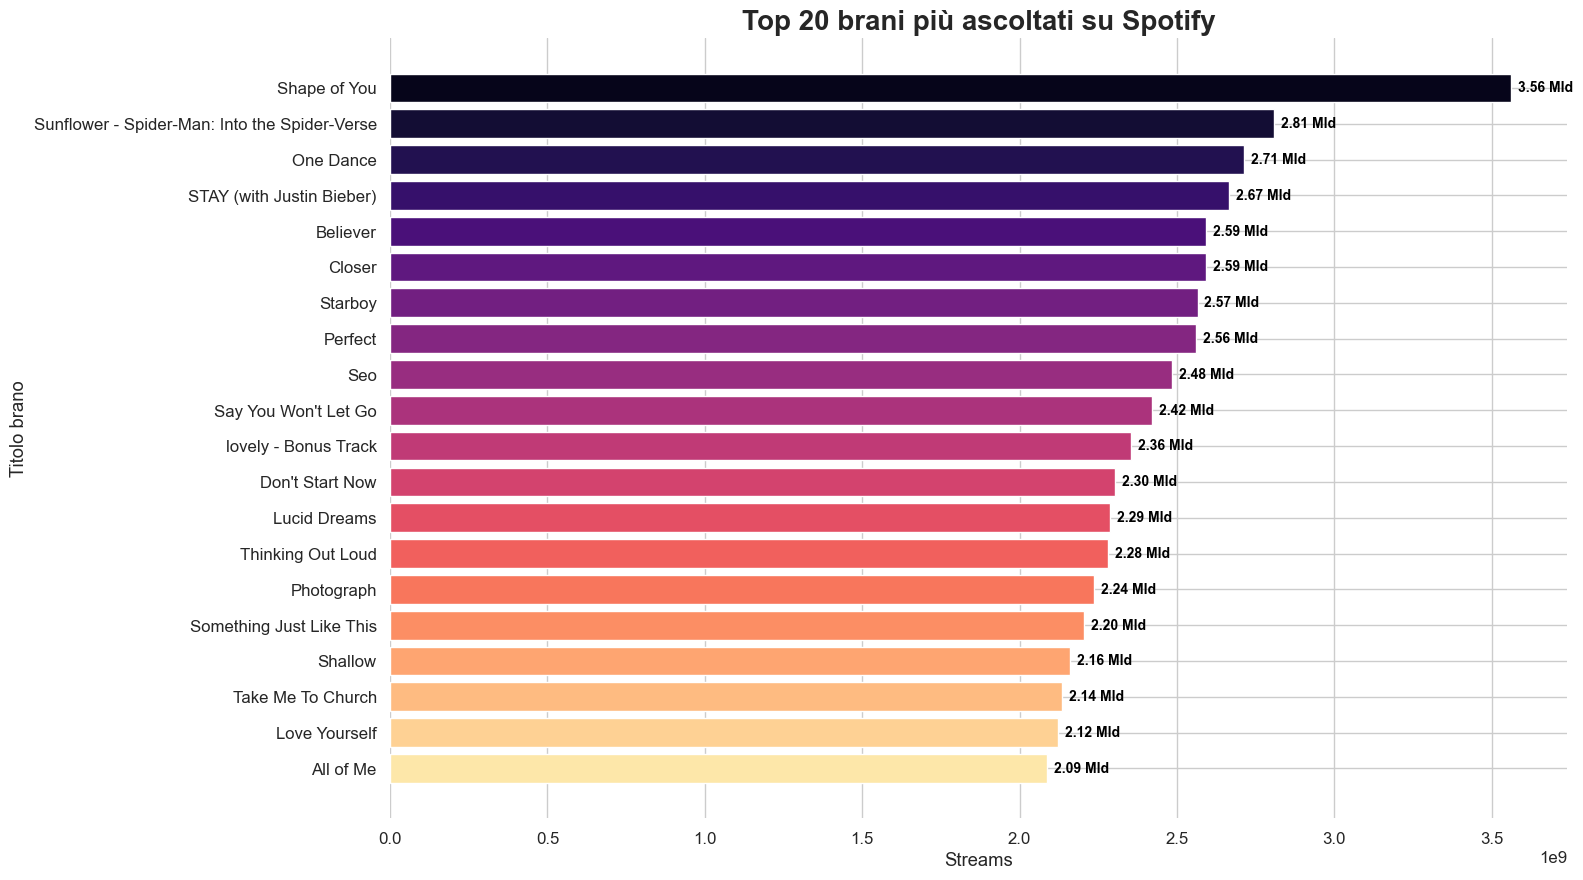

In [60]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
top_tracks = df.sort_values(by='streams', ascending=False).head(20)

#top = top_tracks['streams'].apply(lambda x: f"{int(x):,}".replace(",", "."))
top = top_tracks['streams'].apply(
    lambda x: f"{x / 1e9:.2f} Mld" if x >= 1e9 else f"{x / 1e6:.1f} Mln"
)
sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.barh(top_tracks['track_name'], top_tracks['streams'], color=sns.color_palette("magma", len(top_tracks)))

#ax.bar_label(bars, labels=top, padding=5, fontsize=10)
ax.bar_label(bars, labels=top, padding=5, fontsize=10, color="black", weight="bold")

ax.invert_yaxis()

ax.set_title("Top 20 brani più ascoltati su Spotify", fontsize=20, weight='bold')
ax.set_xlabel("Streams")
ax.set_ylabel("Titolo brano")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [61]:
df1 = pd.read_csv(".\\res\\spotify_2024_clean.csv")
df1.head

<bound method NDFrame.head of                                 Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date          ISRC All Time Rank  Track 

In [62]:
df1['Spotify Streams'] = (
    df1['Spotify Streams']
    .replace({',': ''}, regex=True)
    .replace('', pd.NA)
    .fillna(0)                             # sostituisce NaN con 0
    .astype(int)
)

In [63]:
df1 = df1.drop_duplicates(subset='Track', keep='first')

C:\Users\Sandro\AppData\Local\Temp\ipykernel_15752\1759582582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Spotify Streams'] = pd.to_numeric(df1['Spotify Streams'], errors='coerce')


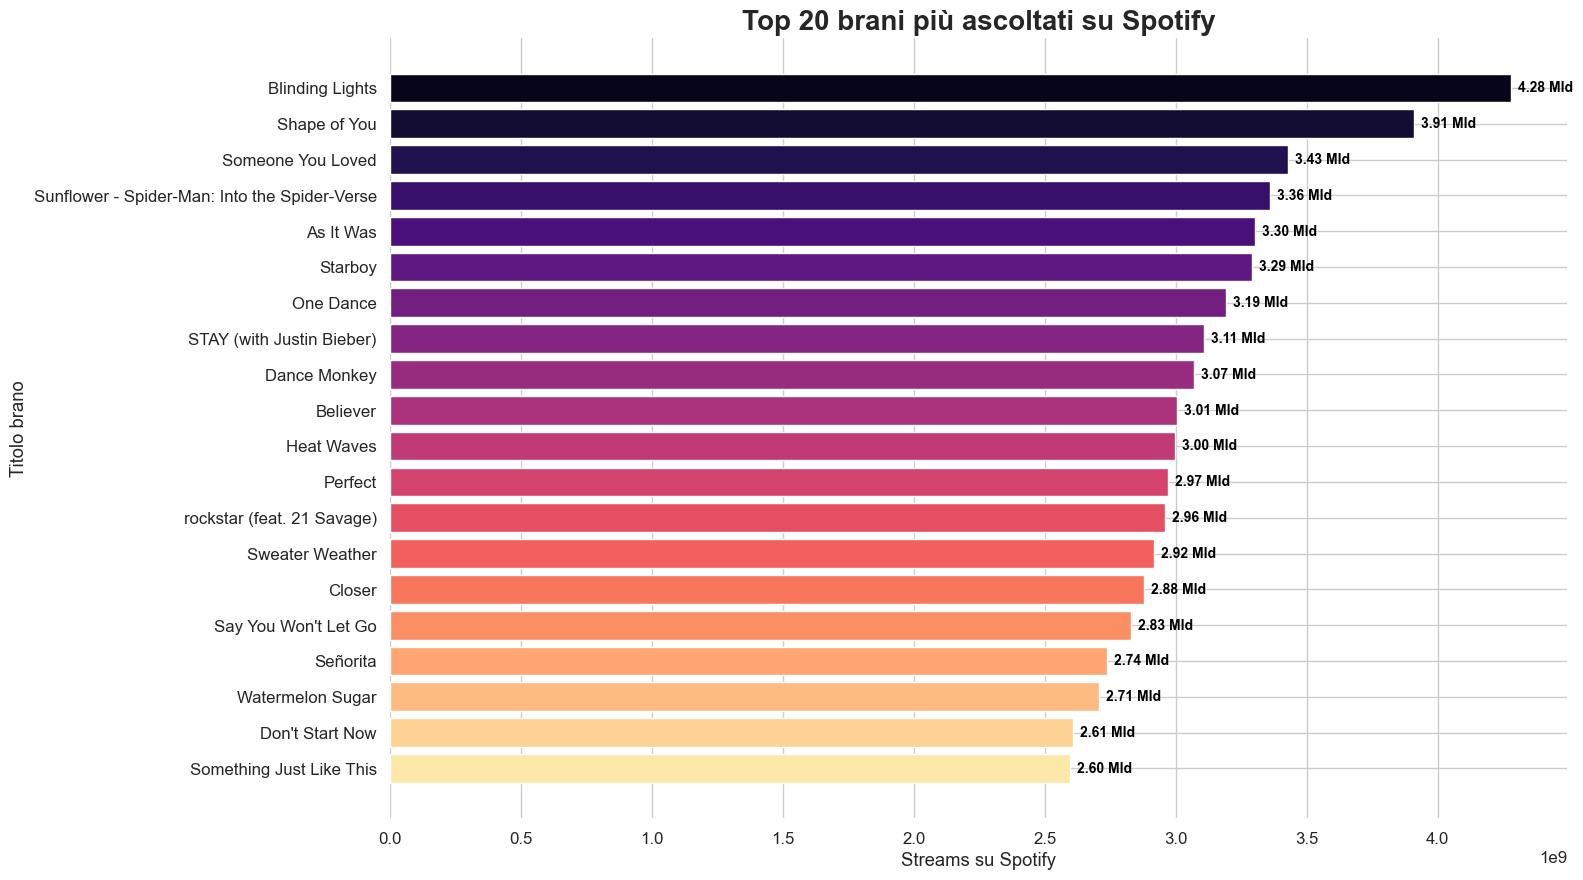

In [79]:
df1['Spotify Streams'] = pd.to_numeric(df1['Spotify Streams'], errors='coerce')
top_tracks = df1.sort_values(by='Spotify Streams', ascending=False).head(20)

#top = top_tracks['Spotify Streams'].apply(lambda x: f"{int(x):,}".replace(",", "."))
top = top_tracks['Spotify Streams'].apply(
    lambda x: f"{x / 1e9:.2f} Mld" if x >= 1e9 else f"{x / 1e6:.1f} Mln"
)

sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.barh(top_tracks['Track'], top_tracks['Spotify Streams'], color=sns.color_palette("magma", len(top_tracks)))

#ax.bar_label(bars, labels=top, padding=5, fontsize=10)
ax.bar_label(bars, labels=top, padding=5, fontsize=10, color="black", weight="bold")

ax.invert_yaxis()

ax.set_title("Top 20 brani più ascoltati su Spotify", fontsize=20, weight='bold')
ax.set_xlabel("Streams su Spotify")
ax.set_ylabel("Titolo brano")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

C:\Users\Sandro\AppData\Local\Temp\ipykernel_15752\371588611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = pd.to_numeric(df1[col].astype(str).str.replace(",", ""), errors='coerce')
C:\Users\Sandro\AppData\Local\Temp\ipykernel_15752\371588611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = pd.to_numeric(df1[col].astype(str).str.replace(",", ""), errors='coerce')


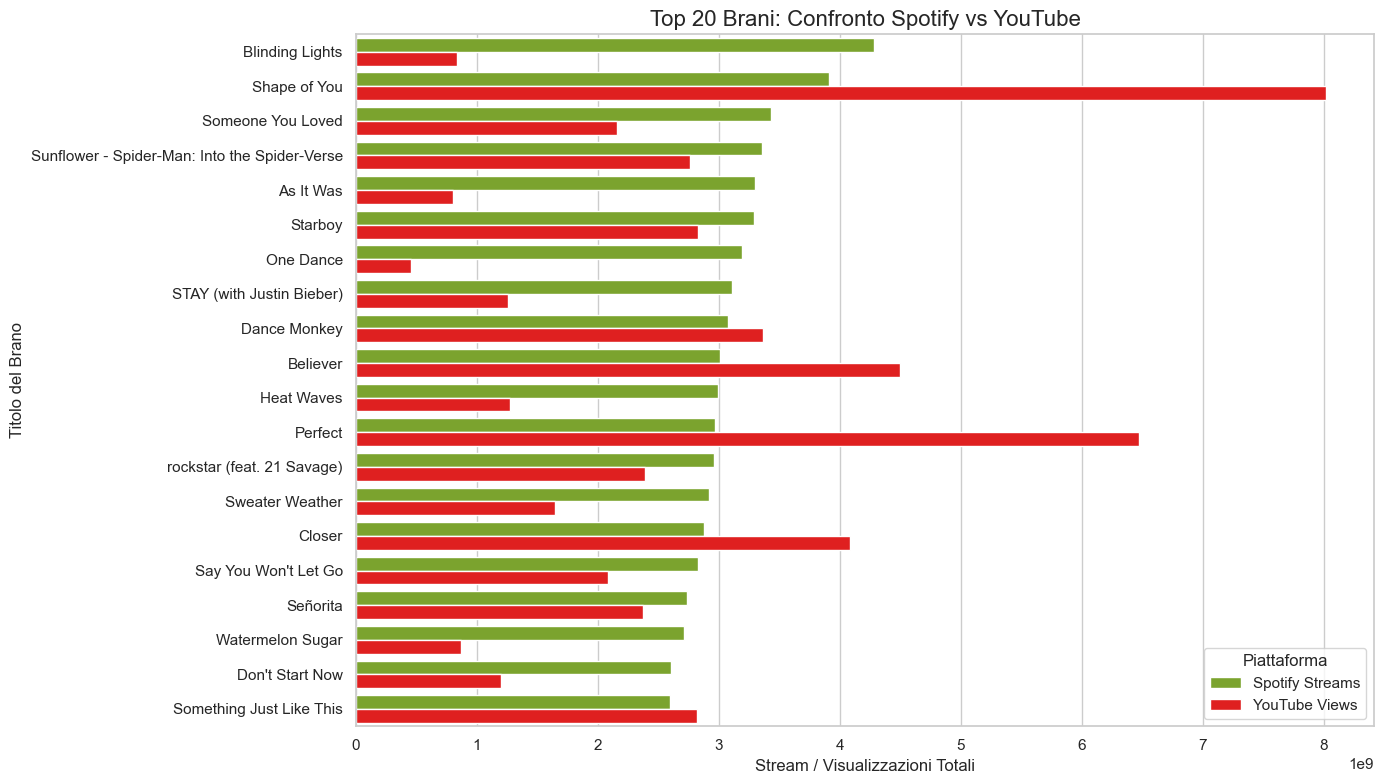

In [78]:
for col in ['Spotify Streams', 'YouTube Views']:
    df1[col] = pd.to_numeric(df1[col].astype(str).str.replace(",", ""), errors='coerce')


top_tracks = df1.nlargest(20, 'Spotify Streams')[['Track', 'Spotify Streams', 'YouTube Views']]

# Formatta per grafico "long"
df_long = top_tracks.melt(id_vars='Track', var_name='Piattaforma', value_name='Visualizzazioni')
custom_palette = {
    'Spotify Streams': '#81b71a',
    'YouTube Views': '#FF0000'
}
# Grafico
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_long, x='Visualizzazioni', y='Track', hue='Piattaforma', palette=custom_palette)

plt.title("Top 20 Brani: Confronto Spotify vs YouTube", fontsize=16)
plt.xlabel("Stream / Visualizzazioni Totali")
plt.ylabel("Titolo del Brano")
plt.tight_layout()
plt.show()

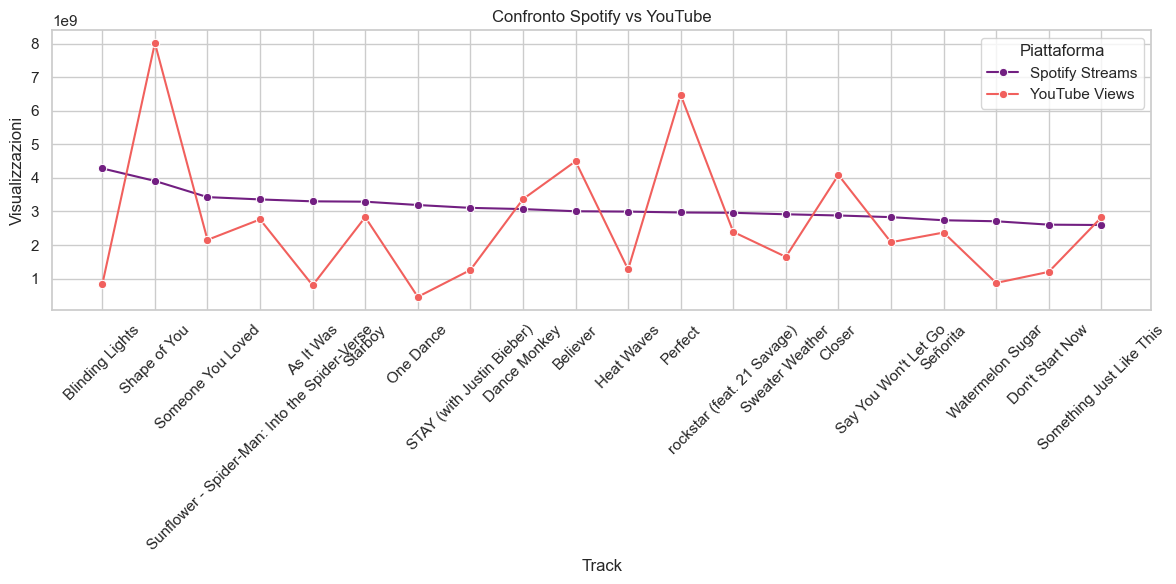

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Track', y='Visualizzazioni', hue='Piattaforma', marker='o', palette='magma')
plt.title("Confronto Spotify vs YouTube")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

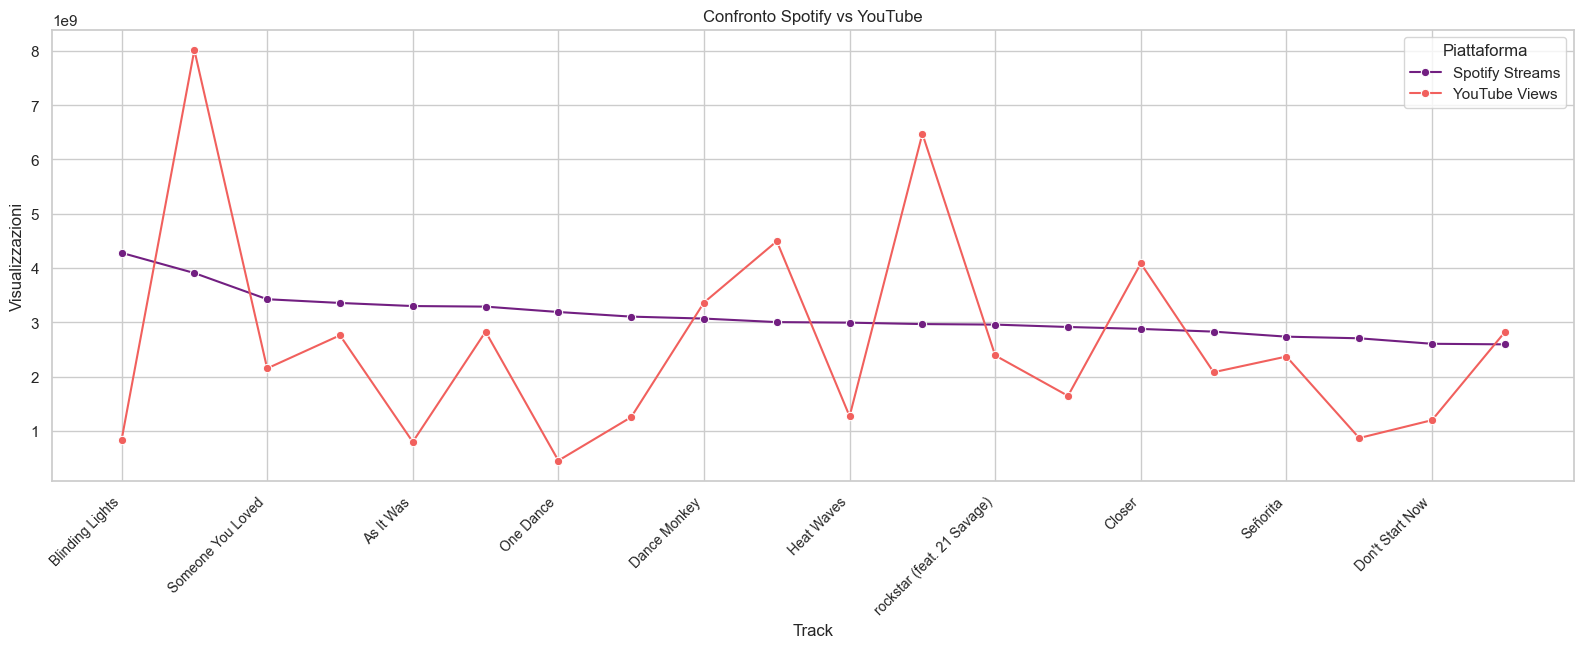

In [67]:
plt.figure(figsize=(16, 7))
ax = sns.lineplot(data=df_long, x='Track', y='Visualizzazioni', hue='Piattaforma', marker='o', palette='magma')

ticks_to_show = ax.get_xticks()[::2]  # mostra solo metà etichette
ax.set_xticks(ticks_to_show)
ax.set_xticklabels([df_long['Track'].unique()[int(t)] for t in ticks_to_show], rotation=45, ha='right', fontsize=10)

plt.title("Confronto Spotify vs YouTube")
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
plt.show()


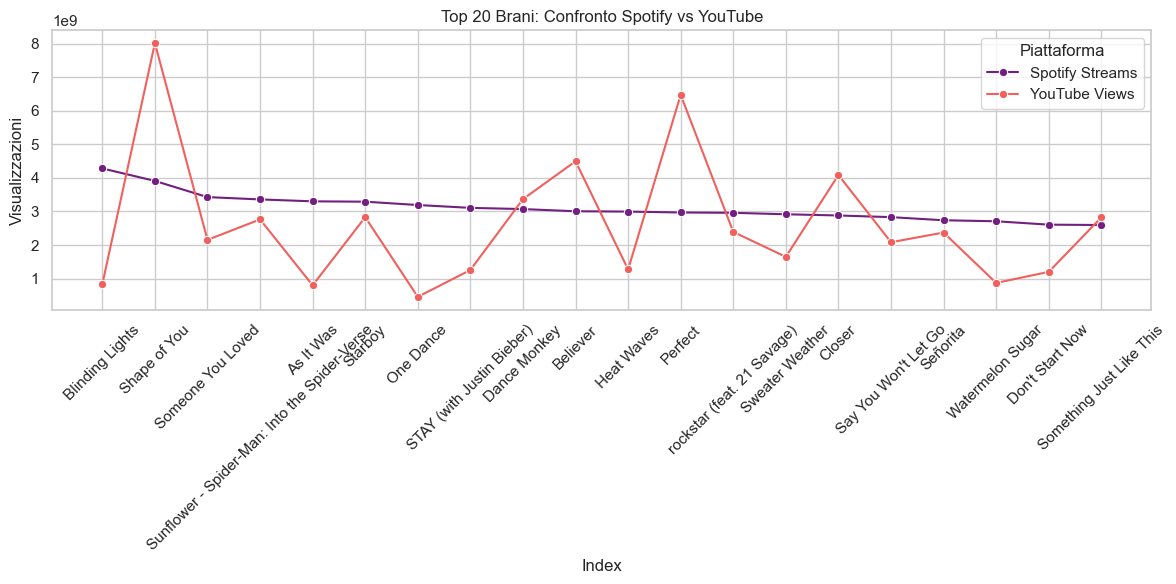

In [68]:
# Aggiungi colonna 'Index' numerica per asse X
df_long['Index'] = df_long.groupby('Piattaforma').cumcount()

# Line plot con indice
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Index', y='Visualizzazioni', hue='Piattaforma', marker='o', palette='magma')

# Aggiungi etichette dei brani come xticks
track_labels = df_long[df_long['Piattaforma'] == 'Spotify Streams']['Track'].values
plt.xticks(ticks=range(len(track_labels)), labels=track_labels, rotation=45)

plt.title("Top 20 Brani: Confronto Spotify vs YouTube")
plt.tight_layout()
plt.show()

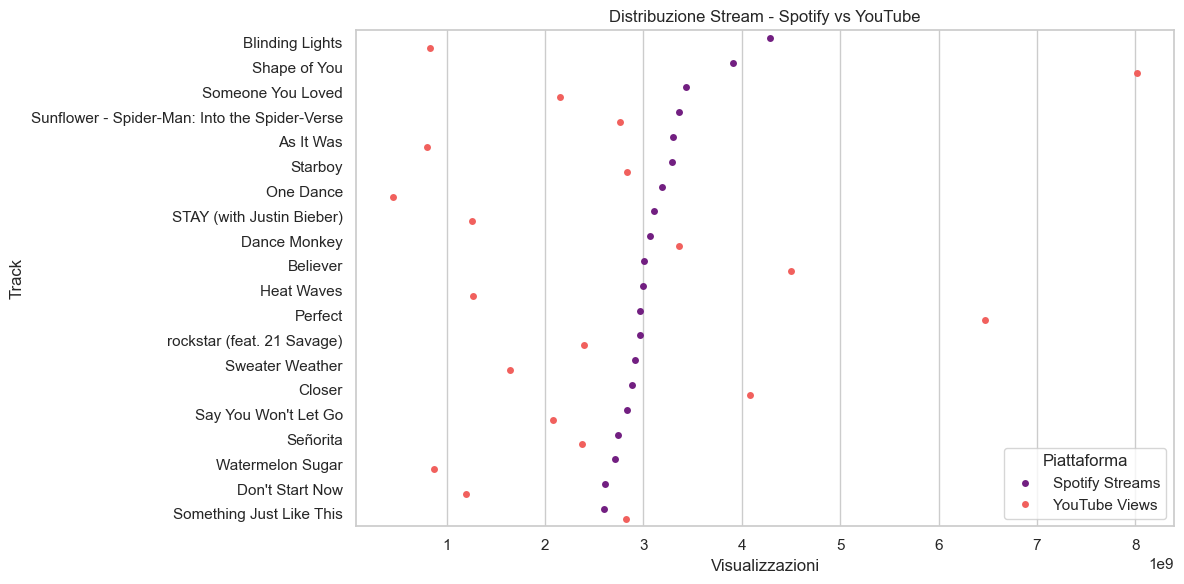

In [69]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_long, x='Visualizzazioni', y='Track', hue='Piattaforma', palette='magma', dodge=True)
plt.title("Distribuzione Stream - Spotify vs YouTube")
plt.tight_layout()
plt.show()

"Buongiorno a tutti, oggi vi presento un'analisi delle canzoni più ascoltate su Spotify, basata su dati aggiornati nel 2024

Con questi grafici vi mostrerò quali sono i brani musicali più ascoltati al mondo.

Ogni barra rappresenta il totale degli stream ricevuti da ogni brano, quindi ci permette di evidenziare la grande popolarità di alcuni di essi, dimostrando con questo grafico che le canzoni Pop/Hip-pop sono le più ascoltate con mild di viwes

In questo grafico confrontiamo i 20 brani più ascoltati su Spotify con le loro visualizzazioni su YouTube, un altro importante canale musicale , basato per lo più da videomusicali

Il grafico mostra, per ogni brano, due barre: una rappresenta gli stream su Spotify e l’altra le visualizzazioni su YouTube

Questa visualizzazione ci permette di capire come alcuni brani possano avere performance diverse nelle due piattaforme. Ad esempio, un brano potrebbe essere molto ascoltato su Spotify ma meno visto su YouTube, o viceversa.

Inoltre, il confronto tra queste due metriche ci dà una panoramica più completa della popolarità di una canzone, considerando non solo l’ascolto in streaming ma anche la funzione video.

Questo tipo di analisi è molto utile per artisti, case discografiche e chiunque lavori nel settore musicale per comprendere meglio i gusti del pubblico e ottimizzare strategie di marketing e distribuzione.

concludendo consigliamo al nostro cliente di affiancare alla pubblicazione del brano su Spotify anche l'uscita del video musicale corrispondente, che accresce le probabilità che il cantante venga conoscuto più rapidamente dal grande pubblico, preferibilmente con un pezzo Pop/Hip-pop.